In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carga del dataset.

In [ ]:
# Dirección en la computadora dónde están las databases (¡tiene que tenerminar con una barra!).
# --------------EDITABLE--------------------.
Path = 'J:/My Drive/Experimento/Plantillas finales/'

In [34]:
# Definir la base en que se va a operar.
# --------------EDITABLE--------------------.
Base = '0. Generales - Base final.xlsx'

In [ ]:
# Definir la carpeta en la que se van a guardar las imágenes finales (¡tiene que tenerminar con una barra!).
# --------------EDITABLE--------------------.
Carpeta_Descarga = ''

In [36]:
# Crear dataframe.
df = pd.read_excel(Path + Base)

Boxplot.

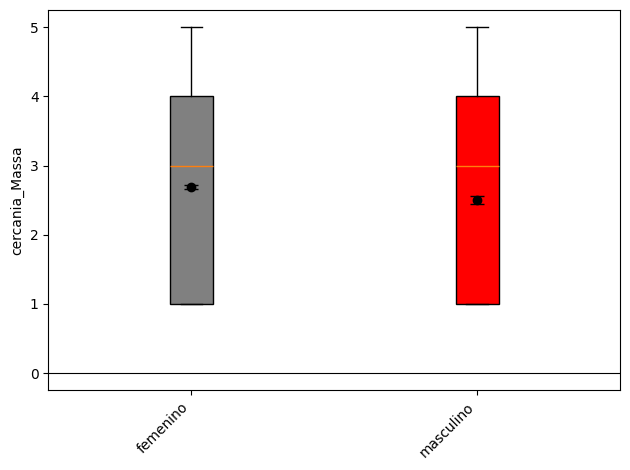

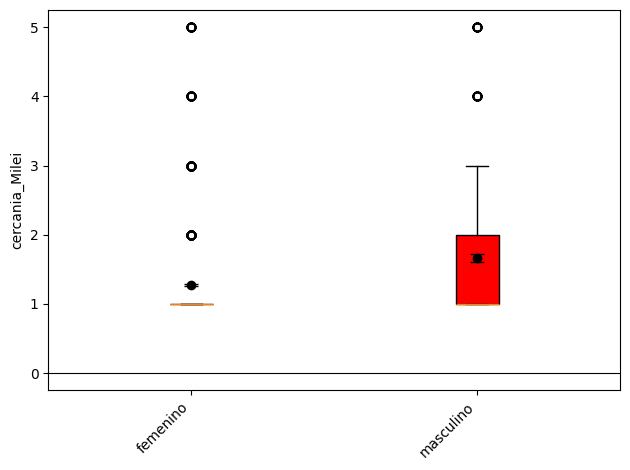

In [ ]:
# Variables a graficar.
# --------------EDITABLE--------------------.
Variables = ['cercania_Massa', 'cercania_Milei']

for Variable in Variables:

    # Lista de categorias a graficar (con el orden deseado).
    # --------------EDITABLE--------------------.
    Categorias_A_Graficar = ['femenino', 'masculino']

    # Lista de colores en el mismo orden.
    # --------------EDITABLE--------------------.
    Colores = ['gray', 'red']

    # Crear una lista para almacenar los datos de cada Categoria.
    Datos_Categorias = []

    for Categoria in Categorias_A_Graficar:
        # Obtener los datos para cada Categoria.
        # --------------EDITABLE--------------------.
        Datos_Categoria = df[df['genero'] == Categoria][Variable]
        Datos_Categorias.append(Datos_Categoria)

    # Crear la figura y el eje.
    Figura, Grafico_1 = plt.subplots()

    # Graficar el boxplot.
    Boxplot = Grafico_1.boxplot(Datos_Categorias, patch_artist=True, showmeans=True,
                                meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 1})

    # Aplicar los colores personalizados a cada boxplot.
    for Patch, Color in zip(Boxplot['boxes'], Colores):
        Patch.set_facecolor(Color)

    # Añadir etiquetas de los Categorias en el eje x.
    Grafico_1.set_xticklabels(Categorias_A_Graficar, rotation=45, ha='right')

    # Añadir etiquetas y rotar los nombres de los Categorias.
    Grafico_1.set_ylabel(Variable)

    # Añadir una línea de base en y = 0.
    Grafico_1.axhline(0, color='black', linewidth=0.8)

    # Fijar límites de los ejes.
    #plt.xlim(0, 6)
    #plt.ylim(0, 30)

    # Calcular y graficar el error estándar para cada Categoria.
    for i, Categoria in enumerate(Categorias_A_Graficar):
        # Obtener los datos del Categoria.
         # --------------EDITABLE--------------------.
        Datos_Categoria = df[df['genero'] == Categoria][Variable]
        # Calcular el error estándar.
        Error_Estandar = Datos_Categoria.std() / np.sqrt(len(Datos_Categoria))
        # Obtener la media.
        Media = Datos_Categoria.mean()
        # Graficar el error estándar como una barra.
        Grafico_1.errorbar(i + 1, Media, yerr=Error_Estandar, fmt='o', color='black', capsize=5)

    # Ajustar el diseño para que las etiquetas no se superpongan.
    plt.tight_layout()

    # Mostrar el gráfico.
    plt.show()

    # Guardar figura.
    Figura.savefig(f"{Carpeta_Descarga}{Variable}_Boxplot.svg", format="svg")

Boxplot agrupado. Acá pueden hacer, por ejemplo, comparaciones entre géneros en las distintas cercanías a candidatos.

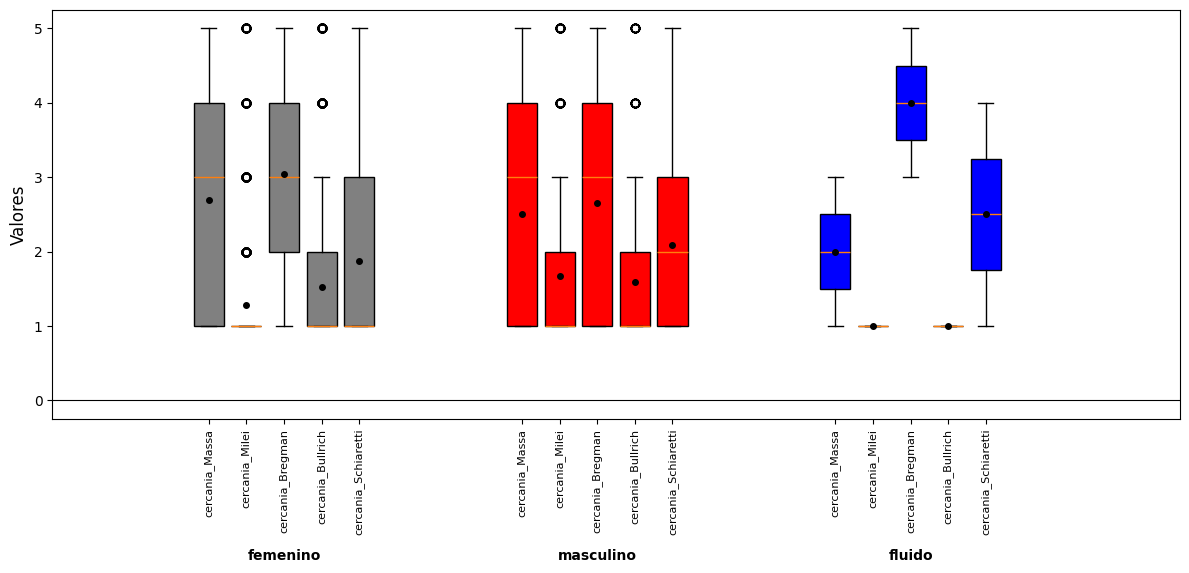

In [ ]:
# Nombre del archivo a guardar.
# --------------EDITABLE--------------------.
Nombre_Archivo = ''

# Variables a graficar.
# --------------EDITABLE--------------------.
Variables = ['cercania_Massa', 'cercania_Milei', 'cercania_Bregman', 'cercania_Bullrich', 'cercania_Schiaretti']

# Lista de categorías a graficar (con el orden deseado).
# --------------EDITABLE--------------------.
Categorias_A_Graficar = ['femenino', 'masculino', 'fluido']

# Lista de colores en el mismo orden.
# --------------EDITABLE--------------------.
Colores = ['gray', 'red', 'blue']  # Colores para cada categoría.

# Crear la figura y el eje.
Figura, Grafico_1 = plt.subplots(figsize=(12, 6))

# Crear posiciones en el eje x para cada grupo de boxplots.
Num_Variables = len(Variables)
Num_Categorias = len(Categorias_A_Graficar)
Ancho_Grupo = 0.6  # Ancho total de un grupo de boxplots.
Desplazamiento = Ancho_Grupo / Num_Variables  # Separación entre variables dentro del grupo.

# Crear un array con todas las posiciones de los boxplots.
Posiciones = []
Etiquetas_Superiores = []  # Etiquetas para variables.
Etiquetas_Inferiores = []  # Etiquetas para categorías.

# Generar los datos y los boxplots agrupados.
for i, Categoria in enumerate(Categorias_A_Graficar):
    Posicion_Base = i  # Posición base del grupo de esta categoría.
    for j, Variable in enumerate(Variables):
        # Calcular posición específica para la variable dentro de la categoría.
        Posicion_Variable = Posicion_Base + j * Desplazamiento
        Posiciones.append(Posicion_Variable)
        
        # Filtrar datos para esta combinación de categoría y variable.
        Datos_Categoria = df[df['genero'] == Categoria][Variable]
        
        # Crear el boxplot.
        Boxplot = Grafico_1.boxplot([Datos_Categoria], positions=[Posicion_Variable], patch_artist=True, widths=Desplazamiento * 0.8,
                                    showmeans=True, meanprops={"marker": "o", "markerfacecolor": "black", 
                                                               "markeredgecolor": "black", "markersize": 4})
        
        # Aplicar color al boxplot según la categoría.
        for Patch in Boxplot['boxes']:
            Patch.set_facecolor(Colores[i])
        
        # Agregar etiquetas para cada nivel.
        Etiquetas_Superiores.append(Variable)
        Etiquetas_Inferiores.append(Categoria)

# Configurar las etiquetas en el eje x.
Grafico_1.set_xticks(Posiciones)
Grafico_1.set_xticklabels(Etiquetas_Superiores, rotation=90, fontsize=8)  # Variables como etiquetas superiores.

# Agregar etiquetas de categorías como un segundo nivel.
for i, Categoria in enumerate(Categorias_A_Graficar):
    Posicion_Categoria = i + (Num_Variables - 1) * Desplazamiento / 2  # Centro del grupo.
    Grafico_1.text(Posicion_Categoria, -2, Categoria, ha='center', va='top', fontsize=10, weight='bold', color='black')

# Ajustar las etiquetas del eje y.
Grafico_1.set_ylabel('Valores', fontsize=12)

# Agregar una línea base en y = 0.
Grafico_1.axhline(0, color='black', linewidth=0.8)

# Ajustar límites para que las etiquetas inferiores sean visibles.
Grafico_1.set_xlim(-0.5, Num_Categorias - 0.5 + Ancho_Grupo)

# Ajustar diseño para evitar superposiciones.
plt.tight_layout()

# Mostrar el gráfico.
plt.show()

# Guardar figura.
Figura.savefig(f"{Carpeta_Descarga}{Nombre_Archivo}_Boxplot.svg", format="svg")

Boxplot esta vez de variables continuas agrupadas en intervalos definidos.

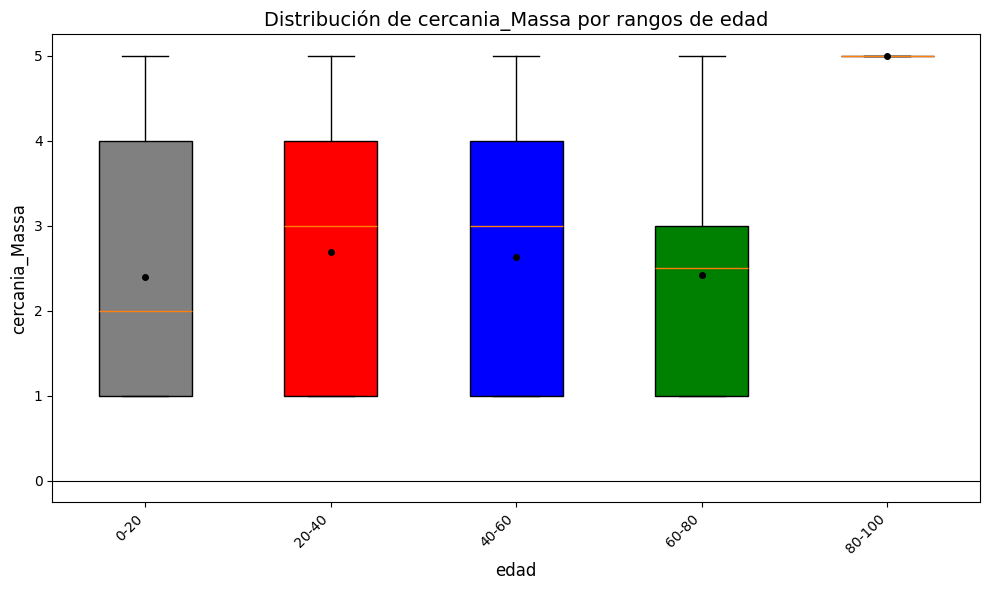

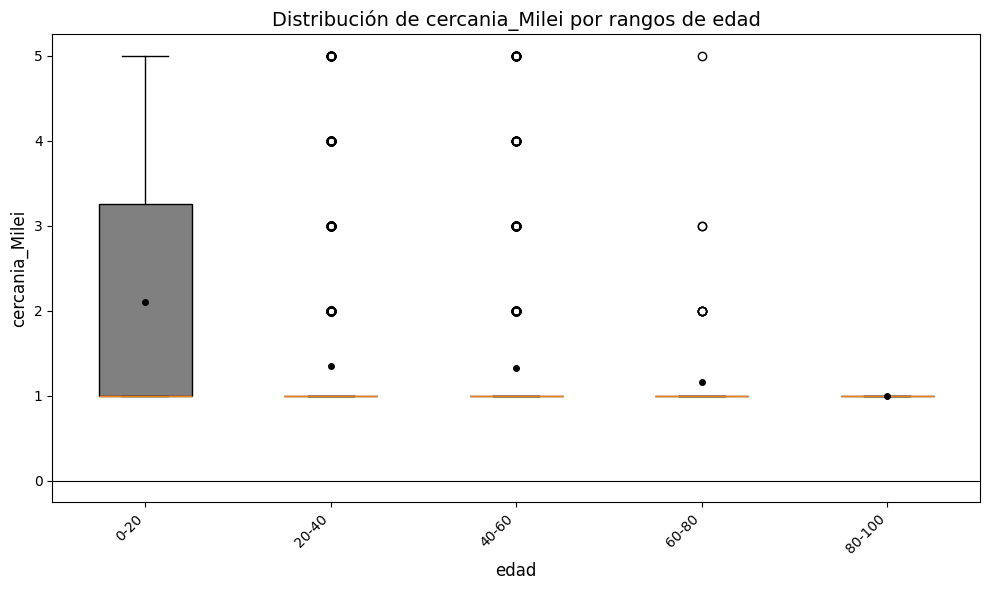

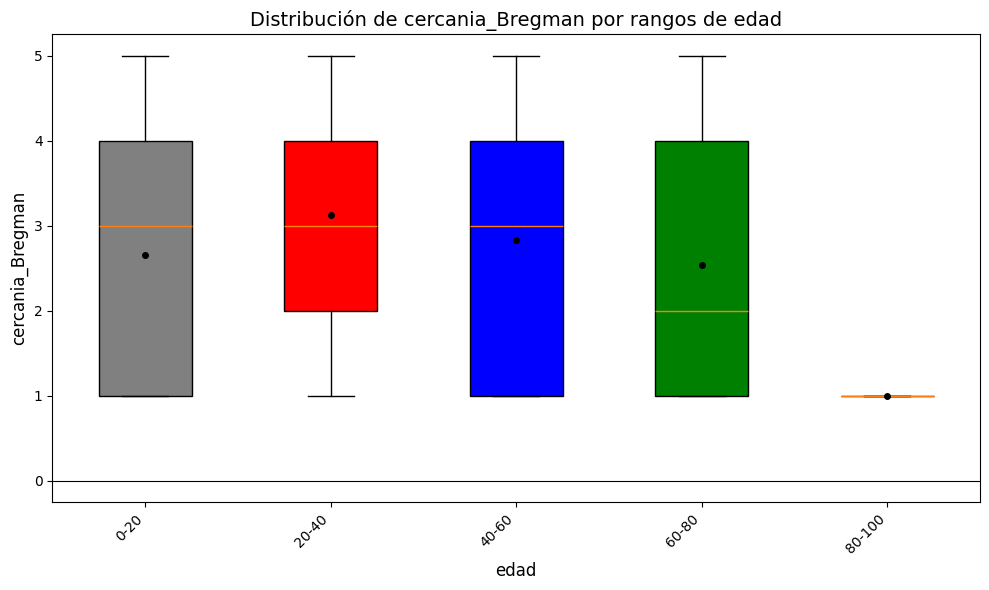

In [ ]:
# Lista de variables a analizar.
# --------------EDITABLE--------------------.
Variables_A_Analizar = ['cercania_Massa', 'cercania_Milei', 'cercania_Bregman']

# Definir la variable continua y el nombre de la columna.
# --------------EDITABLE--------------------.
Variable_Continua = 'edad'  # Nombre de la columna con datos continuos.

# Definir los límites de los intervalos.
# --------------EDITABLE--------------------.
Intervalos = [0, 20, 40, 60, 80, 100]  # Definición de los intervalos.

# Etiquetas para los Intervalos.
Etiquetas_Intervalos = [f"{Intervalos[i]}-{Intervalos[i+1]}" for i in range(len(Intervalos) - 1)]

# Crear una nueva columna para asignar los datos a los Intervalos.
df['Grupo_Intervalo'] = pd.cut(df[Variable_Continua], bins=Intervalos, labels=Etiquetas_Intervalos, right=False)

# Asignar colores para los *boxplots* dentro de cada gráfico.
# --------------EDITABLE--------------------.
Colores = ['gray', 'red', 'blue', 'green', 'orange']  # Colores personalizados para los intervalos.

# Verificar que haya suficientes colores para los intervalos.
if len(Colores) < len(Etiquetas_Intervalos):
    raise ValueError("Debe haber al menos un color por cada intervalo definido.")

# Ciclo para generar un gráfico por cada variable en Variables_A_Analizar.
for Variable_A_Analizar in Variables_A_Analizar:

    # Obtener los datos agrupados por Intervalos.
    Datos_Por_Intervalo = [df[df['Grupo_Intervalo'] == Intervalo][Variable_A_Analizar] for Intervalo in Etiquetas_Intervalos]

    # Crear la figura y el eje.
    Figura, Grafico_1 = plt.subplots(figsize=(10, 6))

    # Crear el boxplot.
    Boxplot = Grafico_1.boxplot(Datos_Por_Intervalo, patch_artist=True, showmeans=True,
                                meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black", "markersize": 4})

    # Aplicar colores personalizados a cada *boxplot* dentro del gráfico.
    for Patch, Color in zip(Boxplot['boxes'], Colores):
        Patch.set_facecolor(Color)

    # Añadir etiquetas en el eje x.
    Grafico_1.set_xticks(range(1, len(Etiquetas_Intervalos) + 1))
    Grafico_1.set_xticklabels(Etiquetas_Intervalos, rotation=45, ha='right')

    # Añadir etiquetas en el eje y.
    Grafico_1.set_ylabel(Variable_A_Analizar, fontsize=12)

    # Añadir etiquetas en el eje x.
    Grafico_1.set_xlabel(Variable_Continua, fontsize=12)

    # Añadir una línea base en y = 0.
    Grafico_1.axhline(0, color='black', linewidth=0.8)

    # Ajustar el diseño para evitar superposición de etiquetas.
    plt.tight_layout()

    # Mostrar el gráfico.
    plt.show()

    # Guardar figura.
    Figura.savefig(f"{Carpeta_Descarga}{Variable_A_Analizar}_Boxplot.svg", format="svg")

Gráfico de barras.

In [ ]:
# Variables a graficar.
# --------------EDITABLE--------------------.
# Variables = ['autopercep_izqder', 'autopercep_conpro', 'autopercep_perantiper']

# for Variable in Variables:

#     # Lista de candidatos a graficar (con el orden deseado).
#     # --------------EDITABLE--------------------.
#     Categorias_A_Graficar = ['Voto en blanco',
#                             'Manuela Castañeira', 'Gabriel Solano', 'Myriam Bregman',
#                             'Juan Grabois', 'Sergio Massa', 'Guillermo Moreno',
#                             'Juan Schiaretti',
#                             'Horacio Rodriguez Larreta', 'Patricia Bullrich', 
#                             'Javier Milei']

#     # Lista de colores en el mismo orden.
#     # --------------EDITABLE--------------------.
#     Colores = ['gray', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'yellow', 'yellow', 'violet']

#     # Medias de variables
#     Medias_Variable = []

#     for Categoria in Categorias_A_Graficar:
#         # --------------EDITABLE--------------------.
#         Medias_Variable.append(df[df['candidato_PASO_2023'] == Categoria][Variable].mean())
        
#     # Crear la figura y el eje.
#     Figura, Grafico_1 = plt.subplots()

#     # Graficar las barras con los colores en el orden correcto.
#     Barras = Grafico_1.bar(Categorias_A_Graficar, Medias_Variable, color=Colores)

#     # Añadir etiquetas y rotar los nombres de los candidatos.
#     Grafico_1.set_ylabel(Variable)
#     plt.xticks(rotation=45, ha='right')

#     # Añadir una línea de base en y = 21.
#     Grafico_1.axhline(5, color='red', linewidth=0.8)

#     # Añadir una línea de base en y = 0.
#     Grafico_1.axhline(0, color='black', linewidth=0.8)

#     # Ajustar el diseño para que las etiquetas no se superpongan.
#     plt.tight_layout()

#     # Mostrar el gráfico.
#     plt.show()
    